In [1]:
import pandas as pd

# Load the CSV file into a dataframe
df = pd.read_csv('./Data/fifa_data.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:

df_sorted_by_overall = df.sort_values(by='Overall', ascending=False)

highest_rated_player = df_sorted_by_overall.iloc[0]
print(highest_rated_player)

Unnamed: 0                                                     0
ID                                                        158023
Name                                                    L. Messi
Age                                                           31
Photo             https://cdn.sofifa.org/players/4/19/158023.png
                                       ...                      
GKHandling                                                  11.0
GKKicking                                                   15.0
GKPositioning                                               14.0
GKReflexes                                                   8.0
Release Clause                                           €226.5M
Name: 0, Length: 89, dtype: object


In [3]:
df_real_madrid = df[df['Club'] == 'Real Madrid']

# Display the first few rows of the dataframe to show players from Real Madrid
df_real_madrid.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
11,11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,€113.7M
27,27,200145,Casemiro,26,https://cdn.sofifa.org/players/4/19/200145.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,90,Real Madrid,...,84.0,88.0,90.0,87.0,13.0,14.0,16.0,12.0,12.0,€126.4M


In [4]:
df['Release Clause'] = df['Release Clause'].str.replace('€', '').str.replace('M', 'e+6').str.replace('K', 'e+3').astype(float)

# Now we sort the dataframe by the 'Release Clause' column in descending order
df_top_release_clauses = df.sort_values(by='Release Clause', ascending=False).head(10)

# Display the top 10 players with the highest release clauses
df_top_release_clauses[['Name', 'Release Clause']]

,Name,Release Clause
2,Neymar Jr,228100000.0
0,L. Messi,226500000.0
4,K. De Bruyne,196400000.0
5,E. Hazard,172100000.0
25,K. Mbappé,166100000.0
17,A. Griezmann,165800000.0
7,L. Suárez,164000000.0
16,H. Kane,160700000.0
11,T. Kroos,156800000.0
30,Isco,156200000.0


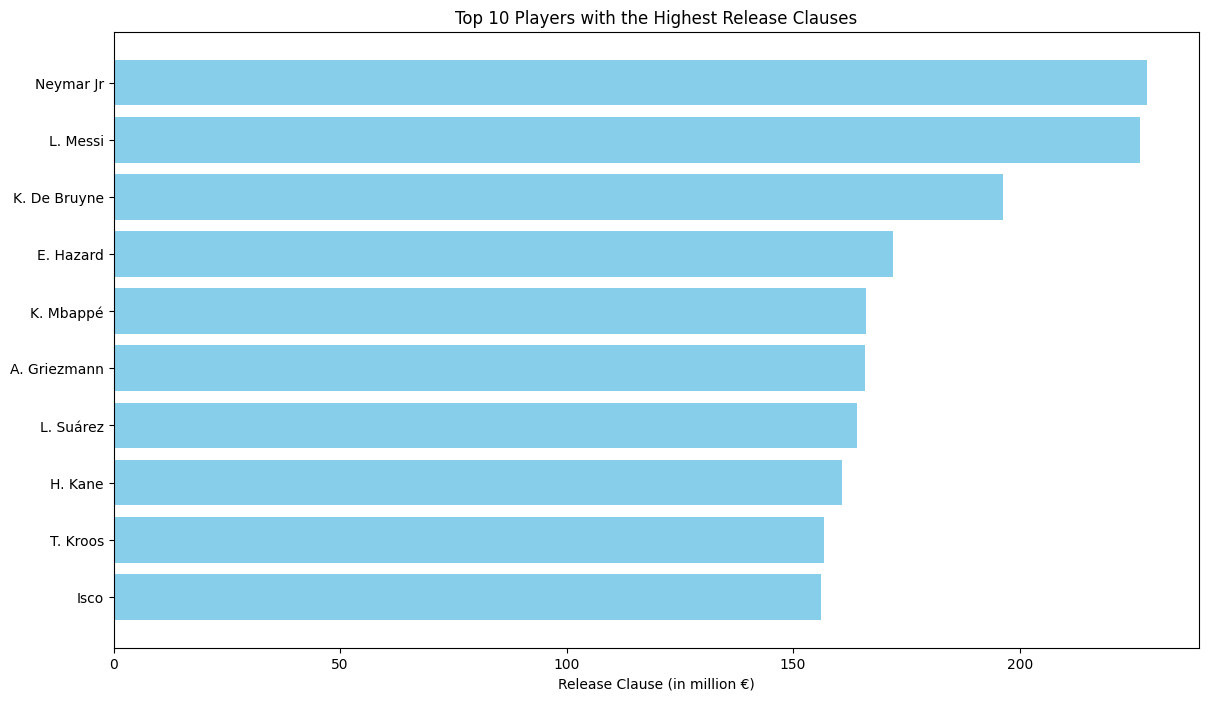

In [5]:
import matplotlib.pyplot as plt

# We will create a bar plot for the top 10 players with the highest release clauses.
plt.figure(figsize=(14,8))
plt.barh(df_top_release_clauses['Name'], df_top_release_clauses['Release Clause']/1e6, color='skyblue')
plt.xlabel('Release Clause (in million €)')
plt.title('Top 10 Players with the Highest Release Clauses')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

In [6]:
df['Finishing'] = pd.to_numeric(df['Finishing'], errors='coerce')

# Now filter the dataframe
df_90plus_finishing = df[df['Finishing'] >= 90][['Name', 'Finishing']]

# Display the first few rows of the dataframe to show players with 90+ finishing
df_90plus_finishing.head(10)

,Name,Finishing
0,L. Messi,95.0
1,Cristiano Ronaldo,94.0
7,L. Suárez,93.0
10,R. Lewandowski,91.0
16,H. Kane,94.0
17,A. Griezmann,90.0
23,S. Agüero,93.0
26,M. Salah,90.0
38,G. Higuaín,92.0
43,M. Icardi,91.0


In [7]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


In [8]:
gas_prices = pd.read_csv("./Data/gas_prices.csv")
gas_prices.head(15)

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11
5,1995,1.95,1.53,4.26,3.96,4.00,4.43,1.11,2.94,3.21,1.15
6,1996,2.12,1.61,4.41,3.94,4.39,3.64,1.25,3.18,3.34,1.23
7,1997,2.05,1.62,4.00,3.53,4.07,3.26,1.47,3.34,3.83,1.23
8,1998,1.63,1.38,3.87,3.34,3.84,2.82,1.49,3.04,4.06,1.06
9,1999,1.72,1.52,3.85,3.42,3.87,3.27,1.79,3.80,4.29,1.17


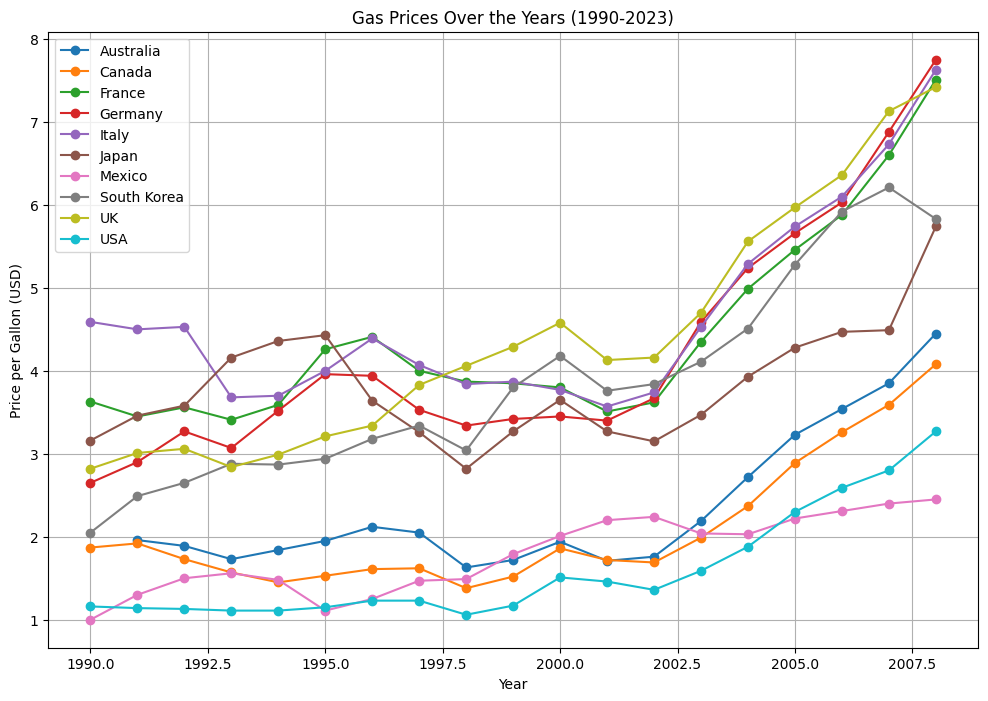

In [9]:
plt.figure(figsize=(12, 8))
for country in gas_prices.columns[1:]:
    plt.plot(gas_prices['Year'], gas_prices[country], marker='o', label=country)
plt.title('Gas Prices Over the Years (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Price per Gallon (USD)')
plt.legend()
plt.grid(True)
plt.show()